In [45]:
from preprocess_text import preprocess_text

In [46]:
import pandas as pd

def preprocess_and_save(input_file, output_file):
    # Function to preprocess text from input_file
    # Assuming preprocess_text() is defined elsewhere
    df = preprocess_text(input_file)
    
    # Save processed data to CSV
    df.to_csv(output_file, index=False)
    
    print(f"Lyrics have been saved to '{output_file}'")

# Example usage:
input_file = './Lyrical_Verses/Enumerated_GreenEggsAndHam.txt'
output_file = './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'

preprocess_and_save(input_file, output_file)


Lyrics have been saved to './Lyrical_Verses_csv/Enumerated_GreenEggsAndHam.csv'


In [47]:
df = pd.read_csv('./Lyrical_Verses_csv/Karma_Police.csv')
df

,Work Title,Subdivision Title,Line
0,karma police,verse 1,karma police arrest this man
1,karma police,verse 1,he talks in maths
2,karma police,verse 1,he buzzes like a fridge
3,karma police,verse 1,hes like a detuned radio
4,karma police,verse 2,karma police arrest this girl
5,karma police,verse 2,her hitler hairdo is making me feel ill
6,karma police,verse 2,and we have crashed her party
7,karma police,chorus,this is what you get
8,karma police,chorus,this is what you get
9,karma police,chorus,this is what you get


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(dataframe):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(dataframe['Line'])
    return tfidf_matrix, vectorizer

tfidf_matrix, vectorizer = vectorize_text(df)


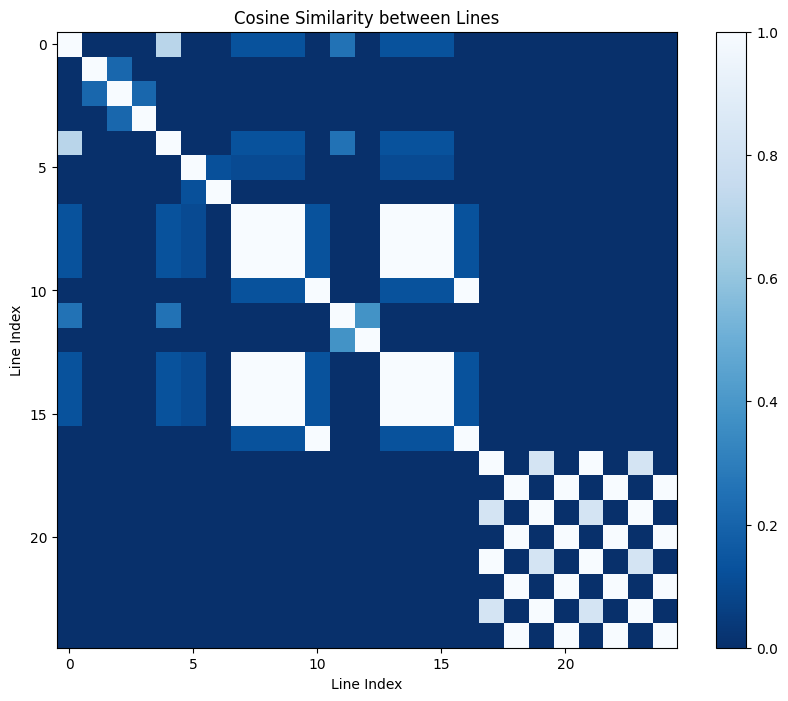

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def visualize_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix)
    plt.figure(figsize=(10, 8))
    plt.imshow(cosine_sim, cmap='Blues_r', aspect='auto')
    plt.colorbar()
    plt.title('Cosine Similarity between Lines')
    plt.xlabel('Line Index')
    plt.ylabel('Line Index')
    plt.show()

visualize_similarity(tfidf_matrix)


In [50]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Generate new text
input_text = "I am an Egg, Green Egg"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

# Decode the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text: ", generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:  I am an Egg, Green Egg, and Green Egg. I am a Green Egg, Green Egg, and Green Egg. I am a Green Egg, Green Egg, and Green Egg. I am a Green Egg, Green Egg, and Green Egg


In [51]:
import numpy as np

def compute_fractal_dimension(cosine_sim, threshold=0.5):
    points = np.argwhere(cosine_sim > threshold)
    distances = np.sqrt((points[:, 0] - points[:, 1])**2)
    radii = np.linspace(1, distances.max(), 50)
    mass = [np.sum(distances < r) for r in radii]
    
    log_radii = np.log(radii)
    log_mass = np.log(mass)
    
    slope, _ = np.polyfit(log_radii, log_mass, 1)
    fractal_dimension = slope
    return fractal_dimension

fractal_dimension = compute_fractal_dimension(cosine_sim)
print(f"Fractal Dimension: {fractal_dimension}")


Fractal Dimension: 0.8680447745256871
